### AUTHOR: VAISHNAV KRISHNA P
#### INTERSHIP: BHARAT INTERN
#### TASK:
* IRIS FLOWER CLASSIFICATION

In [56]:
# Importing necessory libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Scipy library for skeness 
from scipy.stats import skew 
from scipy.stats import kurtosis 

# From sklearn importing the libraries for scaling 
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler

# Importing the libraries to ignore the unnecessory warnings 
import warnings 
warnings.filterwarnings(action="ignore")

# importing models for cress validation scaore training 
from sklearn.model_selection import KFold,cross_val_score,train_test_split

# Importing various classification prediction models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for Model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [78]:
# Loading the dataset 
df = pd.read_csv("IRIS.csv")
data = df.copy()

In [28]:
# Shape of the features
df.shape

(150, 5)

In [29]:
# description about the features 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [30]:
# first five records 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA 
1. MISSING VALUE ANALYSIS 
2. FEATURE DISTRUBUTION
3. CORELATION ANALYSIS 
4. OUTLIER ANALYSIS

#### MISSING VALUE ANALYSIS

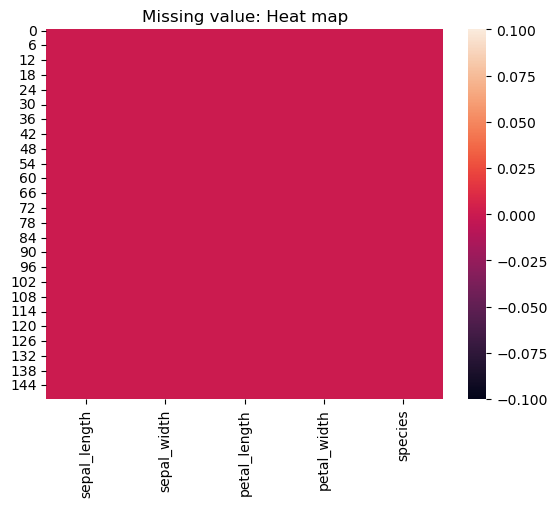

In [31]:
# Missing value analysis 
plt.title("Missing value: Heat map")
sns.heatmap(df.isnull())
plt.show()

Dataset is free from missing values.

#### DISTRUBUTION OF THE FEATURES

In [32]:
# First checking the number of unique values in each features
for feature in df.columns:
    print("{}:No of unique values {}".format(feature,df[feature].nunique()))

sepal_length:No of unique values 35
sepal_width:No of unique values 23
petal_length:No of unique values 43
petal_width:No of unique values 22
species:No of unique values 3


In [33]:
# Extracting the continous features and the categorical features
continous_features = []
categorical_features = []

for feature in df.columns:
    if df[feature].nunique() <= 10:
        categorical_features.append(feature)
    else:
        continous_features.append(feature)
print("Continous features: ",continous_features)
print("Categorical features: ",categorical_features)
print("Number of categorical features: ",len(categorical_features))
print("Number of continous features: ",len(continous_features))

Continous features:  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Categorical features:  ['species']
Number of categorical features:  1
Number of continous features:  4


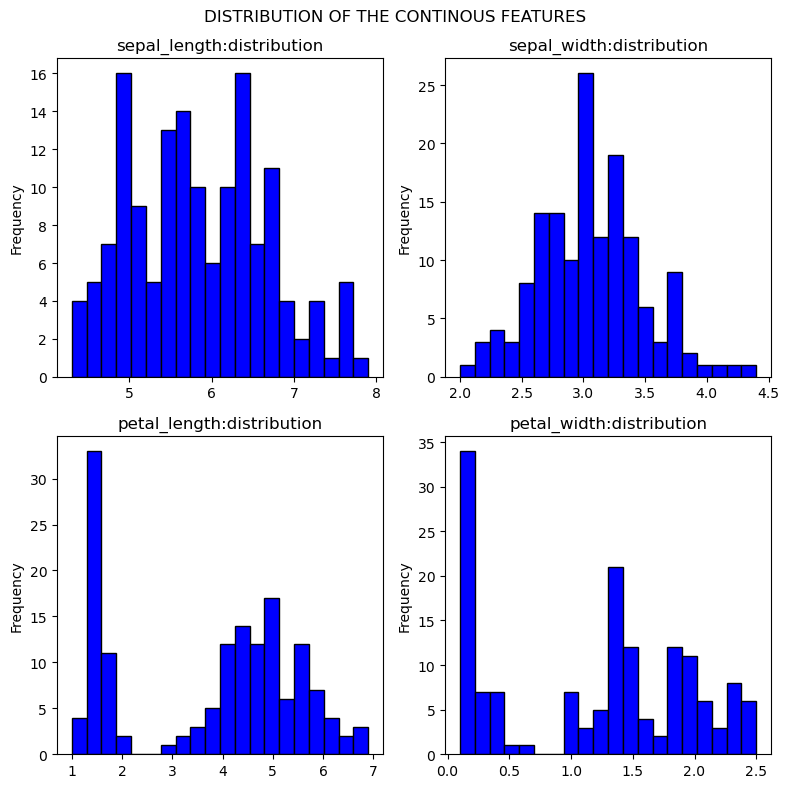

In [34]:
# histogram for the distrubution of the categorical features
plt.figure(figsize=(8,8))
c = 1
plt.suptitle("DISTRIBUTION OF THE CONTINOUS FEATURES")
for feature in continous_features:
    plt.subplot(2,2,c)
    c += 1
    df[feature].plot(kind="hist",bins=20,color="b",edgecolor = "k",title=f"{feature}:distribution")
plt.tight_layout()
plt.show()

In [35]:
# checking the skewness of the features 
for feature in continous_features:
    print("{}:skewness is {} kurtosis is {}".format(feature,skew(df[feature]),kurtosis(df[feature])))

sepal_length:skewness is 0.3117530585022963 kurtosis is -0.5735679489249765
sepal_width:skewness is 0.330702812773315 kurtosis is 0.24144329938318343
petal_length:skewness is -0.2717119501716388 kurtosis is -1.3953593021397128
petal_width:skewness is -0.10394366626751729 kurtosis is -1.3352456441311857


* A positive kurtosis indicates that the distribution has heavier tails and a sharper peak compared to the normal distribution, while a negative kurtosis indicates that the distribution has lighter tails and a flatter peak compared to the normal distribution.
* Sepal length and sepal width follows a normal distrubution

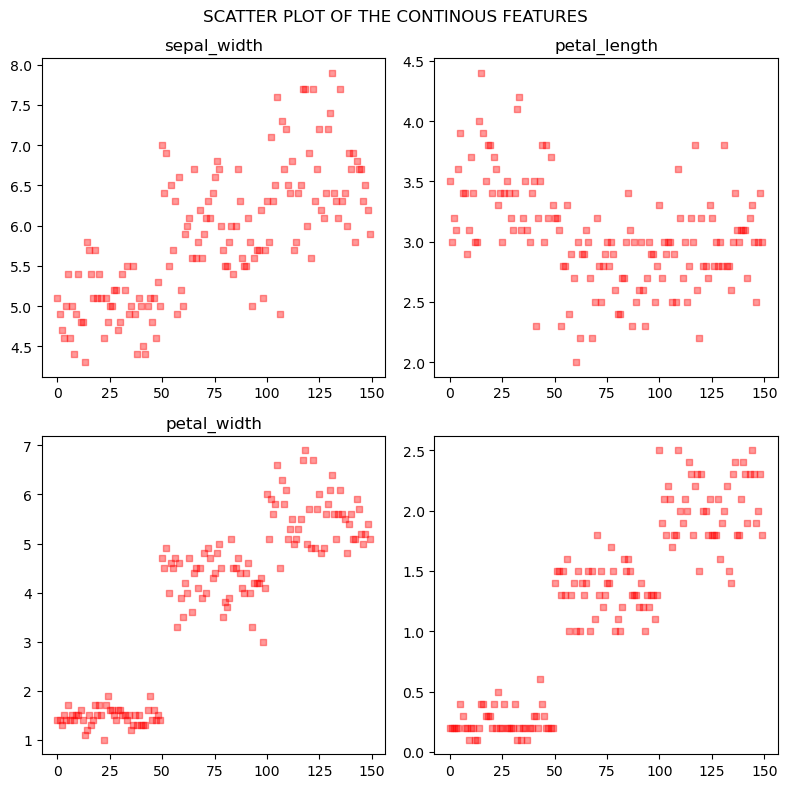

In [36]:
# Scatter plot for the distrubution of the categorical features
plt.figure(figsize=(8,8))
c = 1
plt.suptitle("SCATTER PLOT OF THE CONTINOUS FEATURES")
for feature in continous_features:
    plt.title(f"{feature}")
    plt.subplot(2,2,c)
    c += 1
    plt.scatter(np.arange(len(df)),df[feature],color="r",marker="s",alpha=0.4,s=20)
plt.tight_layout()
plt.show()

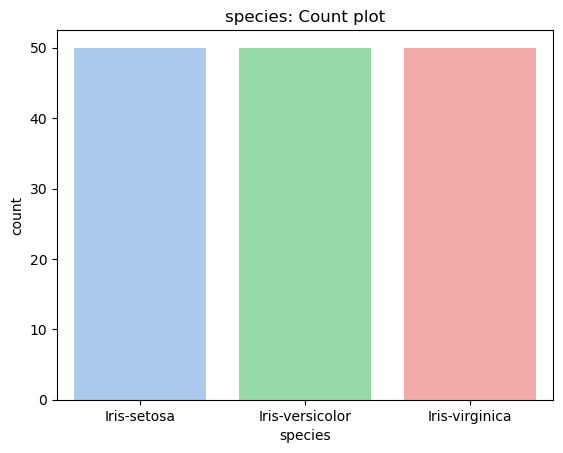

In [37]:
# Count plot for the categorical features to understand the feature distribution
for feature in categorical_features:
    plt.title(f"{feature}: Count plot")
    sns.countplot(x=feature,data = df,saturation=0.75,palette="pastel6")
plt.show()

* All the categories have same count.

#### CORELATION ANALYSIS 

In [38]:
# Disvtionay for encoding
data = df.copy()
dict_encoding_species = {}
unique_label = data["species"].unique()
i = 1

for label in unique_label:
    dict_encoding_species[label] = i
    i += 1
dict_encoding_species

{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}

In [39]:
# Encoding
data["species"] = data["species"].map(dict_encoding_species)

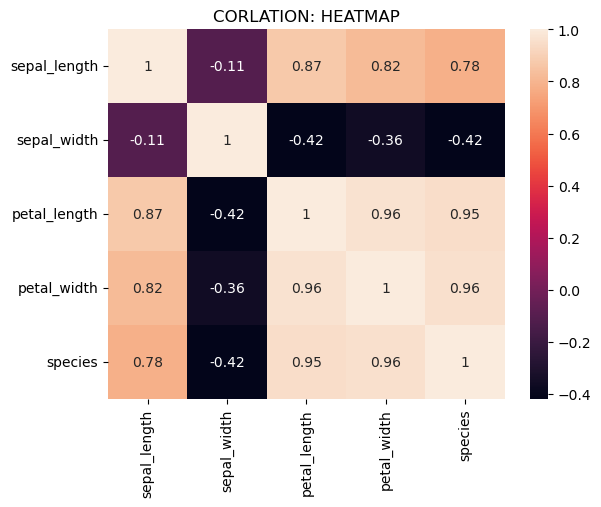

In [40]:
# Corelation matrix 
plt.title("CORLATION: HEATMAP")
sns.heatmap(data.corr(),annot=True)
plt.show()

* Petal length and petal width are highly corelated features to the species prediction.ie,96% 

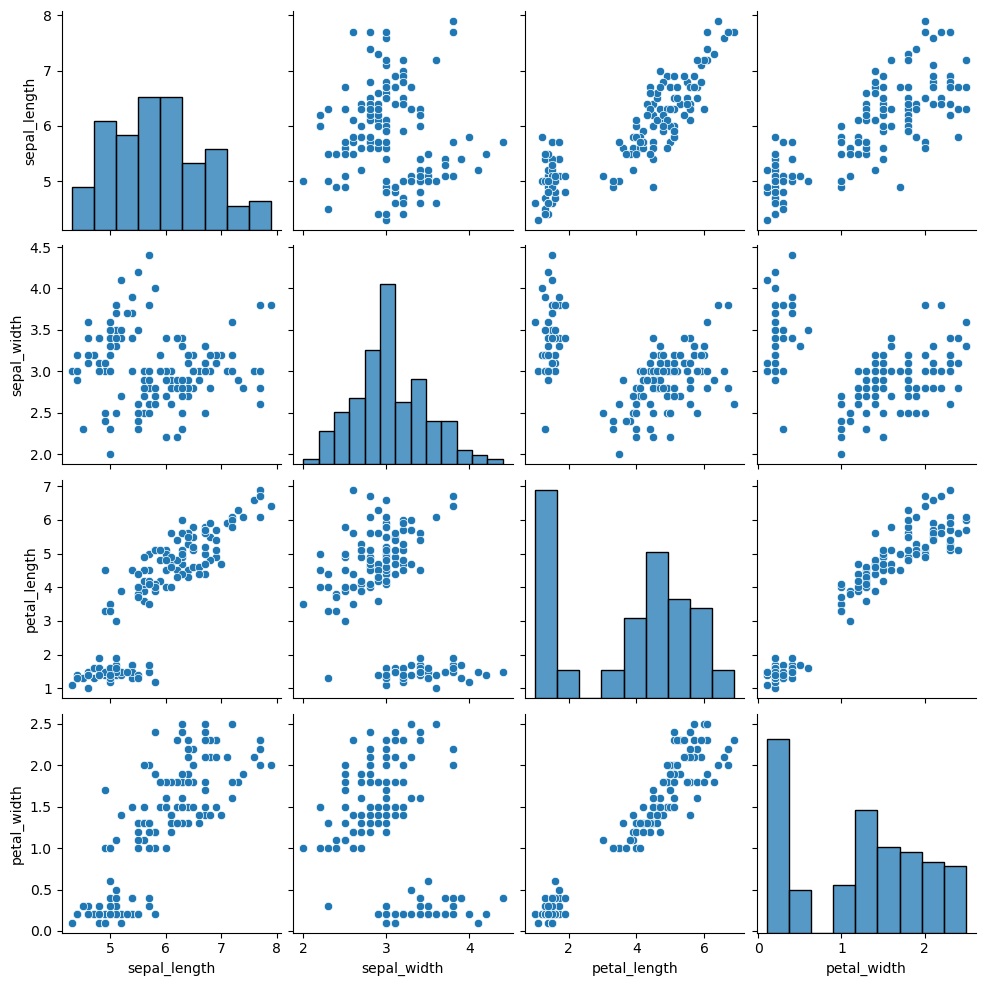

In [41]:
# Pair plot 
sns.pairplot(data=df,kind="scatter")
plt.show()

#### OUTLIER ANALYSIS

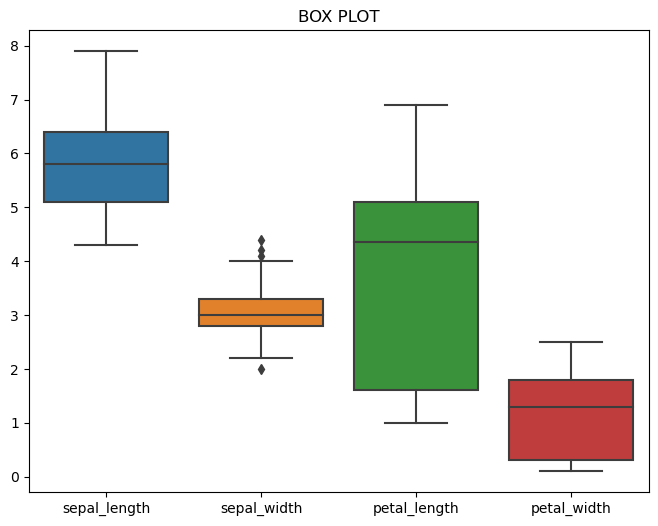

In [42]:
# Boxplot
plt.figure(figsize=(8,6))
plt.title("BOX PLOT")
sns.boxplot(data = df[continous_features])
plt.show()

* Majority of the features does not have any outlier points 

### FEATURE ENGINEERING 
1. feature Transformation 
2. feature Scaling 
3. Data Reduction

#### Feature Transformation

In [43]:
# Feature Transformation -  Encoding the features 
df["species"] = df["species"].map(dict_encoding_species)

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#### Data Reduction

In [45]:
# Removing the multicolinear features 
multicolinear_features = ["petal_length","sepal_length","sepal_width"]
df.drop(columns=multicolinear_features,inplace=True)

#### Feature Scaling 

In [46]:
# Scaling of the feature using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

for feature in df.columns:
    if feature != "species":
        df[feature] = scaler.fit_transform(df[[feature]])

In [47]:
df.head(2)

,petal_width,species
0,0.041667,1
1,0.041667,1


### SPOT CHECK USING
1. Logistic Regression
2. SVC
3. KNN
4. Decision Tree Classifier
5. Random Forest classifier

In [48]:
model_list = ["LogisticRegression","SVC","KNN","DTC","RFC"]
results = []
no_s = 10
kfold = KFold(n_splits=no_s)
X = df.drop(columns="species")
y = df["species"]

# Training using Logistic Regression
model = LogisticRegression()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# Training using Support vector Michine
model = SVC()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# K neighbors classifier 
model = KNeighborsClassifier()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# Using Decision Tree classifier
model = DecisionTreeClassifier()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# Random Forst classifier
model = RandomForestClassifier()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

results

[0.8066666666666666, 0.96, 0.96, 0.9533333333333334, 0.9533333333333334]

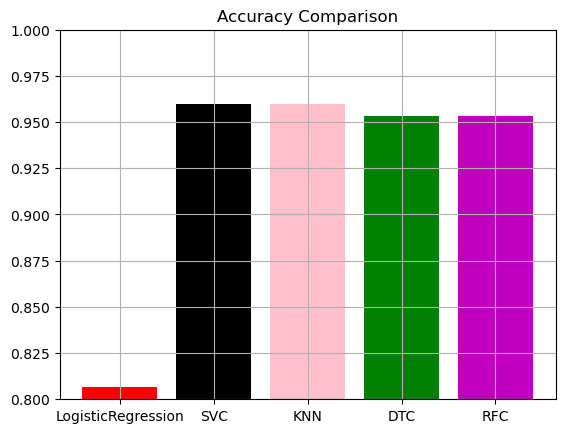

In [49]:
plt.title("Accuracy Comparison")
plt.bar(model_list,results,color=["r","k","pink","g","m"])
plt.ylim(0.8,1.0)
plt.grid(True)
plt.show()

* SVC(Support Vector Michine),KNN(Kneighbors classifier) has a high accuracy of almost 96

### SPLITTING THE DATASET INTO TRAIN AND TEST

In [62]:
# Splitting the dataset into train test split
test_size = 0.2
seed = 42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size,shuffle=True,random_state=seed)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 1), (30, 1), (120,), (30,))

### CREATING A MODEL 

In [64]:
# Training of the model using SVC
iris_model = SVC()
iris_model.fit(X_train,y_train)

SVC()

In [65]:
y_pred = iris_model.predict(X_test)

print("Accuracy score: ",accuracy_score(y_pred,y_test))
print("Classification report:\n",classification_report(y_pred,y_test))

Accuracy score:  1.0
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



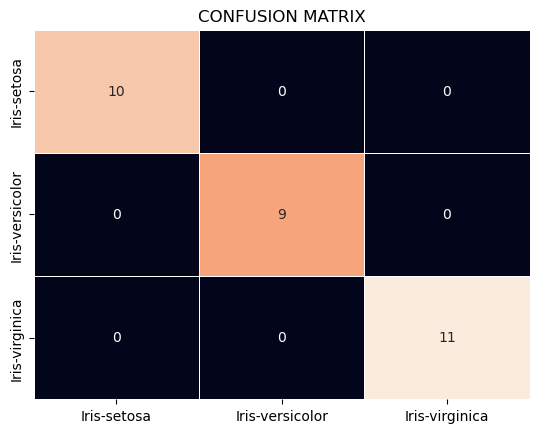

In [76]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,cbar=False,linewidth=0.7)
plt.title("CONFUSION MATRIX")
plt.xticks([0.5,1.5,2.5],["Iris-setosa","Iris-versicolor","Iris-virginica"])
plt.yticks([0.5,1.5,2.5],["Iris-setosa","Iris-versicolor","Iris-virginica"])
plt.show()

### PREDICTIVE MODEL

In [80]:
def minmax_scale(value):
    scaled_value = (value - data["petal_width"].describe()["min"])/(data["petal_width"].describe()["max"] - data["petal_width"].describe()["min"])
    return scaled_value

In [89]:
petal_width_value = float(input("Enter the petal width value: "))
scaled_value = minmax_scale(petal_width_value)

predicted_value = iris_model.predict([[scaled_value]])

if predicted_value == 1:
    print("FLOWER IS: IRIS-SETOSA")
elif predicted_value == 2:
    print("FLOWER IS: IRIS_VERSICOLOR")
else:
    print("FLOWER IS: IRIS-VIRGINICA")

Enter the petal width value: 2.3
FLOWER IS: IRIS-VIRGINICA
